<h3>TP 1 remis par :</h3>
<ul>
    <li>CHAMI Meriem</li>
    <li>RAZKELLAH Amina</li>
</ul>

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

#Affichage des images



*   Il y a un contraste de gris entre les zones claires (probablement des zones urbaines ou des zones de haute réflexion) et les zones sombres (mer et ombres des montagnes).




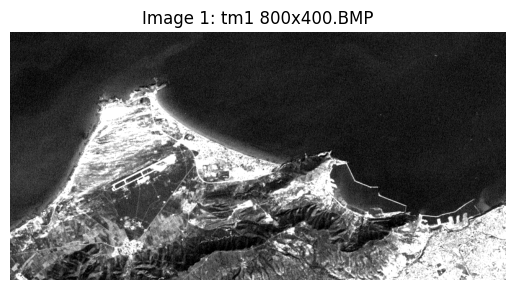

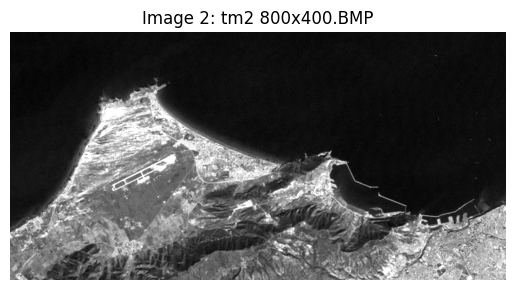

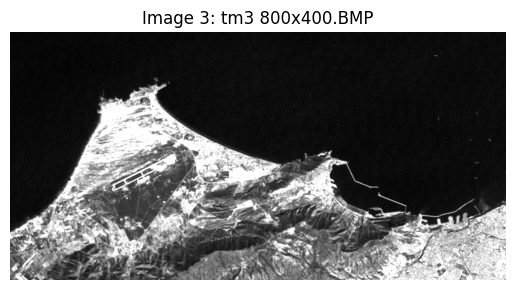

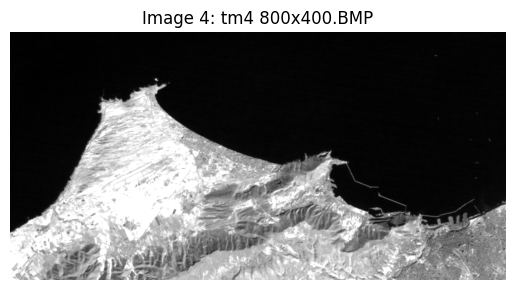

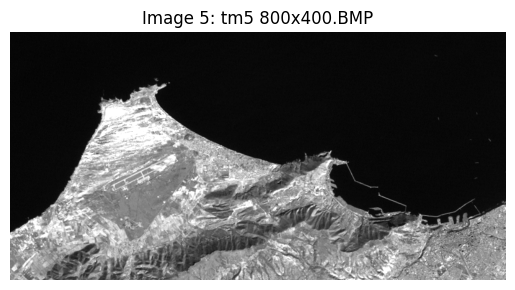

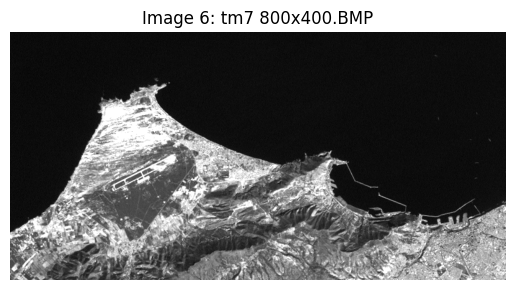

In [6]:
#"C://Users//Trust_pc_dz//Documents//ISAT//TP1ISAT//imgs"
dossier_images = 'oran'
images_bmp = [f for f in os.listdir(dossier_images) if f.endswith('.BMP')]
images_array = []

for i, fichier_image in enumerate(images_bmp):
    image_path = os.path.join(dossier_images, fichier_image)


    image = Image.open(image_path).convert('L')
    matrice_image = np.array(image)


    images_array.append(matrice_image)


    plt.figure(i)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'Image {i+1}: {fichier_image}')
    plt.show()


#Composition

In [7]:
def compo_images(r, g, b):

    image_composite = np.zeros((r.shape[0], r.shape[1], 3), dtype=r.dtype)

    image_composite[:, :, 0] = r  # Rouge
    image_composite[:, :, 1] = g  # Vert
    image_composite[:, :, 2] = b  # Bleu

    return image_composite

##Composition TM3, TM2 et TM1

D'aprés cette image on peut ditinguer la répartition des différents types de surfaces (eau, végétation, zones urbaines) de manière réaliste.

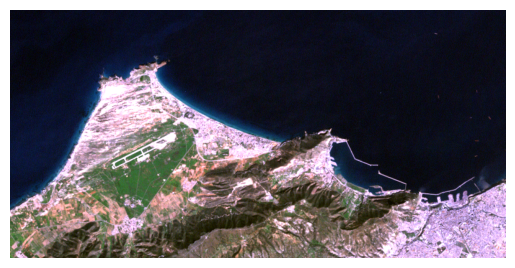

In [8]:
image_resultat = compo_images(images_array[2], images_array[1], images_array[0])

imageCombiné = Image.fromarray(image_resultat)  # entiers
plt.imshow(imageCombiné)
plt.axis('off')
plt.show()

##Composition TM4, TM2 et TM1

Cette image révèle des informations sur l'état et la distribution de la végétation, les ressources en eau, qui peut être bénéfique pour des études en agriculture.

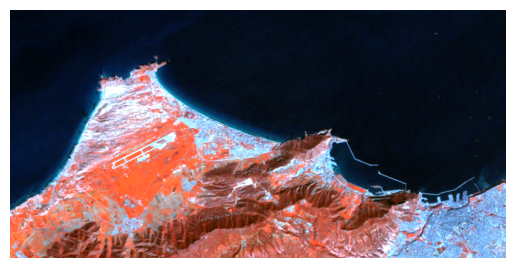

In [9]:
image_resultat = compo_images(images_array[3], images_array[1], images_array[0])

imageCombiné = Image.fromarray(image_resultat.astype(np.uint8))
plt.imshow(imageCombiné)
plt.axis('off')
plt.show()

##Composition TM5,6, TM2 et TM1

Oui il est possible de faire d'autre composition tant qu'il y a les 3 canaux.
Chaque image revéle une information grace a la difference des canaux .

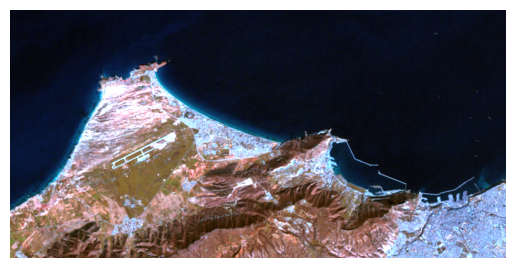

In [10]:
image_resultat = compo_images(images_array[4], images_array[1], images_array[0])

imageCombiné = Image.fromarray(image_resultat.astype(np.uint8))
plt.imshow(imageCombiné)
plt.axis('off')
plt.show()

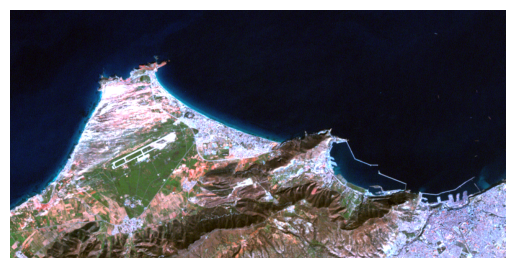

In [11]:
image_resultat = compo_images(images_array[5], images_array[1], images_array[0])

imageCombiné = Image.fromarray(image_resultat.astype(np.uint8))
plt.imshow(imageCombiné)
plt.axis('off')
plt.show()

#Histogram

##TM1, TM2 et TM3

Il y a un pic très élevé aux alentours de la valeur de pixel faible (proche de 0), indiquant une grande quantité de pixels sombres ou noirs. Cela pourrait être dû à la présence de grandes zones sombres dans l'image, comme la mer ou des ombres.

In [12]:
def histogram_transform(image):

    if isinstance(image, Image.Image):
        image = np.array(image)


    if len(image.shape) == 2:
        pixel_list = image.flatten()
        print('visualisation de la liste : ',pixel_list)

        histogramme_list = [0] * 256
        #histogramme_list = []
        for pixel in pixel_list:
            histogramme_list[pixel] += 1


        plt.bar(range(256), histogramme_list)

        plt.xlabel('Valeur du pixel')
        plt.ylabel('Fréquence du pixel')
        plt.title('Histogram')

        plt.show()

    elif len(image.shape) == 3:
        image_resultat_np = np.array(image)

        histogramme_r = [0] * 256
        histogramme_g = [0] * 256
        histogramme_b = [0] * 256

        pixels_r = image_resultat_np[:, :, 0].flatten()
        pixels_g = image_resultat_np[:, :, 1].flatten()  # Canal vert
        pixels_b = image_resultat_np[:, :, 2].flatten()  # Canal bleu

        for pixel in pixels_r:
            histogramme_r[pixel] += 1

        for pixel in pixels_g:
            histogramme_g[pixel] += 1

        for pixel in pixels_b:
            histogramme_b[pixel] += 1

        plt.figure(figsize=(10, 6))

        plt.plot(range(256), histogramme_r, color='red', label='Rouge')
        plt.plot(range(256), histogramme_g, color='green', label='Vert')
        plt.plot(range(256), histogramme_b, color='blue', label='Bleu')

        plt.xlabel('Valeur du pixel')
        plt.ylabel('Fréquence')
        plt.title('Histogramme combiné des canaux Rouge, Vert et Bleu')
        plt.legend()
        plt.show()


visualisation de la liste :  [ 13  38  26 ... 166 127 140]


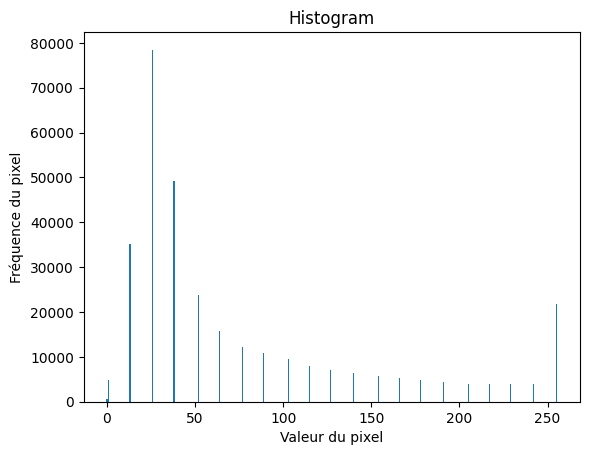

visualisation de la liste :  [ 12   6   6 ... 149 131 137]


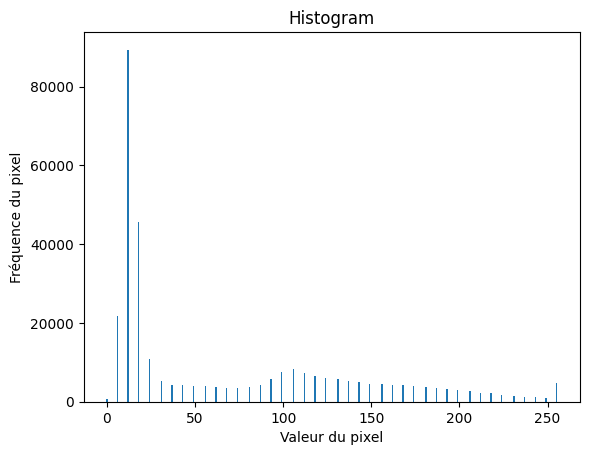

visualisation de la liste :  [  6   6   6 ... 203 151 136]


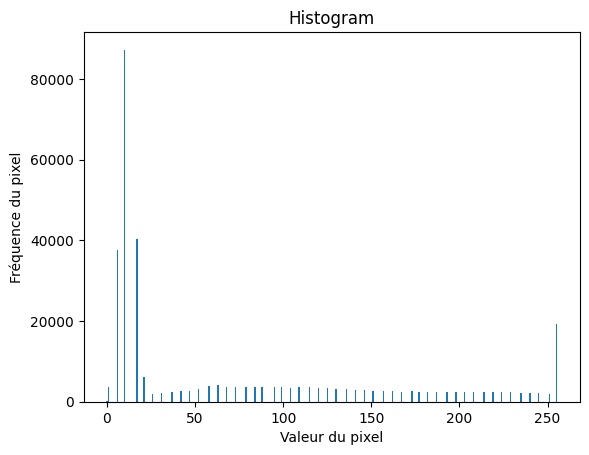

In [13]:
histogram_transform(images_array[0])
histogram_transform(images_array[1])
histogram_transform(images_array[2])

##Image en couleur

Oui on peut réaliser un histogram pour une image en couleur en affichant chaque canaux de couleurs.

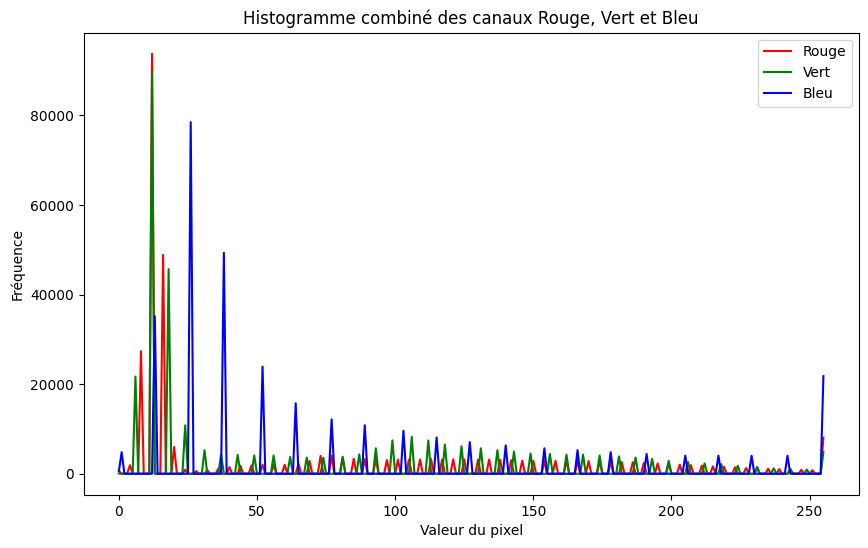

In [14]:
histogram_transform(imageCombiné)